In [6]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import PIL
import warnings
from glob import glob
from IPython.display import display, Image
import io
import pydotplus
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

%matplotlib inline

In [7]:
data = pd.read_csv(r"C:\Users\lenovo\Desktop\Thesis\Dataset final\Suicide_dataset_numeric.csv")

In [8]:
features = data.columns
features

Index(['attempt_suicide', 'Age_group', 'Gender', 'Marital_status',
       'Occupation', 'Problem_with_family', 'Marital_dissatisfaction',
       'Relationship_problem', 'Unexpected_result_or_failed in exam',
       'Sexual_harassment', 'financial_constraint', 'Problem_in_workspace',
       'Victim_of_domestic_violation', 'Chronic_physical_illness', 'Depressed',
       'Struggled_with_dept', 'Mentall_illness_apart_from depression',
       'Not_getting_job', 'False_allegation', 'Age'],
      dtype='object')

In [9]:

features = [x for x in features if x != 'attempt_suicide' and x != 'Age']
#We choosed to use age group instead of age
features

['Age_group',
 'Gender',
 'Marital_status',
 'Occupation',
 'Problem_with_family',
 'Marital_dissatisfaction',
 'Relationship_problem',
 'Unexpected_result_or_failed in exam',
 'Sexual_harassment',
 'financial_constraint',
 'Problem_in_workspace',
 'Victim_of_domestic_violation',
 'Chronic_physical_illness',
 'Depressed',
 'Struggled_with_dept',
 'Mentall_illness_apart_from depression',
 'Not_getting_job',
 'False_allegation']

In [10]:
train, test = train_test_split(data, test_size = 0.3)
print(len(data))
print(len(train))
print(len(test))

426
298
128


In [11]:
RF = RandomForestClassifier(n_estimators=5, max_depth=2,
                             random_state=0)

In [18]:
x_train = train[features]
y_train = train["attempt_suicide"]

x_test = test[features]
y_test = test["attempt_suicide"]
RF = RF.fit(x_train, y_train)

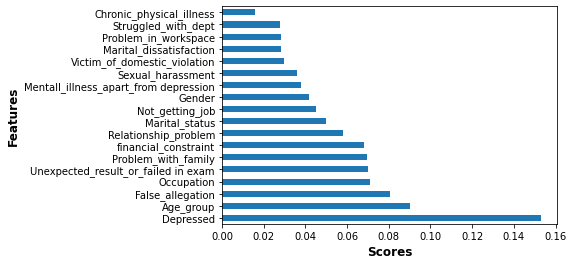

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.ylabel('Features',fontsize=12,fontweight='bold')
plt.xlabel('Scores',fontsize=12,fontweight='bold')
plt.show()